In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
# Load the dataset
data = pd.read_csv("salary_anomaly_dataset_modified.csv")
data

,Salary_INR,Working_Hours
0,"Rs 562,178",42.54704387870132 hrs
1,"Rs 965,500",47.84734761782484 hrs
2,"Rs 812,396",44.88040447428418 hrs
3,"Rs 719,061",37.44401640622144 hrs
4,"Rs 409,213",36.058531211006446 hrs
...,...,...
495,NaN,17.326565866130732 hrs
496,"Rs 347,514",83.38508603697943 hrs
497,"Rs 2,990,935",20.945490473516912 hrs
498,"Rs 1,556,366",NaN


In [3]:
data.isnull().sum()

Salary_INR       25
Working_Hours    25
dtype: int64

In [4]:
df=data.dropna()

In [5]:
df

,Salary_INR,Working_Hours
0,"Rs 562,178",42.54704387870132 hrs
1,"Rs 965,500",47.84734761782484 hrs
2,"Rs 812,396",44.88040447428418 hrs
3,"Rs 719,061",37.44401640622144 hrs
4,"Rs 409,213",36.058531211006446 hrs
...,...,...
492,"Rs 616,304",31.77161097839701 hrs
493,"Rs 2,887,104",57.21845334952697 hrs
496,"Rs 347,514",83.38508603697943 hrs
497,"Rs 2,990,935",20.945490473516912 hrs


In [6]:
df.isnull().sum()

Salary_INR       0
Working_Hours    0
dtype: int64

In [7]:
df.describe()

,Salary_INR,Working_Hours
count,454,454
unique,454,454
top,"Rs 1,826,617",45.68046183663646 hrs
freq,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 454 entries, 0 to 499
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Salary_INR     454 non-null    object
 1   Working_Hours  454 non-null    object
dtypes: object(2)
memory usage: 10.6+ KB


In [9]:
# Cleaning Salary column (removing 'Rs', ',' and converting to numeric)
df['Salary_INR'] = df['Salary_INR'].astype(str).str.replace('Rs', '', regex=True)
df['Salary_INR'] = df['Salary_INR'].str.replace(',', '', regex=True).astype(float)
df

C:\Users\JOYEETA\AppData\Local\Temp\ipykernel_16048\1736762214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary_INR'] = df['Salary_INR'].astype(str).str.replace('Rs', '', regex=True)
C:\Users\JOYEETA\AppData\Local\Temp\ipykernel_16048\1736762214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary_INR'] = df['Salary_INR'].str.replace(',', '', regex=True).astype(float)


,Salary_INR,Working_Hours
0,562178.0,42.54704387870132 hrs
1,965500.0,47.84734761782484 hrs
2,812396.0,44.88040447428418 hrs
3,719061.0,37.44401640622144 hrs
4,409213.0,36.058531211006446 hrs
...,...,...
492,616304.0,31.77161097839701 hrs
493,2887104.0,57.21845334952697 hrs
496,347514.0,83.38508603697943 hrs
497,2990935.0,20.945490473516912 hrs


In [10]:
# Cleaning Working Hours column (removing 'hrs' and converting to float)
df['Working_Hours'] = df['Working_Hours'].astype(str).str.replace('hrs', '', regex=True).astype(float)
df

C:\Users\JOYEETA\AppData\Local\Temp\ipykernel_16048\2112406232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Working_Hours'] = df['Working_Hours'].astype(str).str.replace('hrs', '', regex=True).astype(float)


,Salary_INR,Working_Hours
0,562178.0,42.547044
1,965500.0,47.847348
2,812396.0,44.880404
3,719061.0,37.444016
4,409213.0,36.058531
...,...,...
492,616304.0,31.771611
493,2887104.0,57.218453
496,347514.0,83.385086
497,2990935.0,20.945490


In [11]:
df['Working_Hours'].iloc[0]

np.float64(42.54704387870132)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 454 entries, 0 to 499
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Salary_INR     454 non-null    float64
 1   Working_Hours  454 non-null    float64
dtypes: float64(2)
memory usage: 10.6 KB


In [13]:
# Ensure Working Hours has only 2 decimal places
df['Working_Hours'] = df['Working_Hours'].round(2)
df

C:\Users\JOYEETA\AppData\Local\Temp\ipykernel_16048\2346733392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Working_Hours'] = df['Working_Hours'].round(2)


,Salary_INR,Working_Hours
0,562178.0,42.55
1,965500.0,47.85
2,812396.0,44.88
3,719061.0,37.44
4,409213.0,36.06
...,...,...
492,616304.0,31.77
493,2887104.0,57.22
496,347514.0,83.39
497,2990935.0,20.95


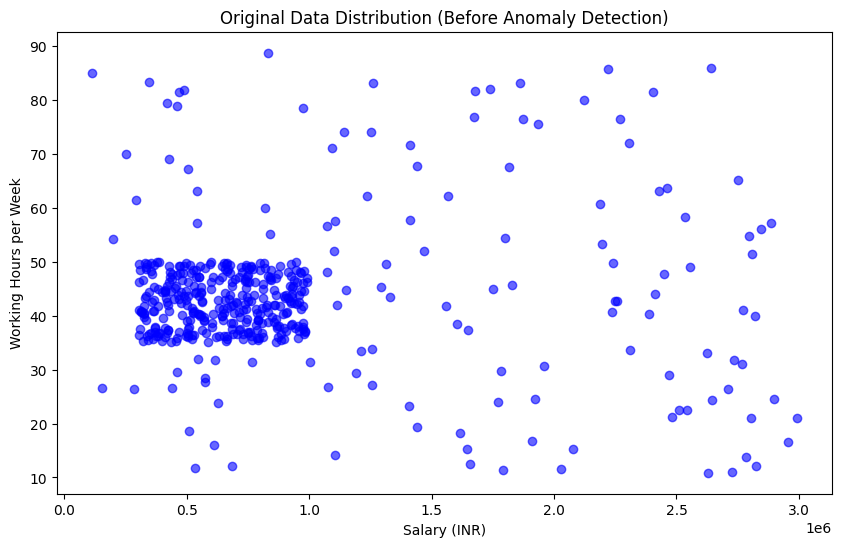

In [14]:
# 📌 Plot 1: Original Data Distribution (Before Anomaly Detection)
plt.figure(figsize=(10, 6))
plt.scatter(df['Salary_INR'], df['Working_Hours'],  color="blue",alpha=0.6)
plt.xlabel("Salary (INR)")
plt.ylabel("Working Hours per Week")
plt.title("Original Data Distribution (Before Anomaly Detection)")
plt.show()

### Method 1 to detect Anomalies

In [15]:
# Step 1: Fit Isolation Forest with 'auto' contamination
iso_forest = IsolationForest(contamination="auto", random_state=42)
df['Anomaly_values'] = iso_forest.fit_predict(df[['Salary_INR', 'Working_Hours']])

C:\Users\JOYEETA\AppData\Local\Temp\ipykernel_16048\771146131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anomaly_values'] = iso_forest.fit_predict(df[['Salary_INR', 'Working_Hours']])


In [16]:
df

,Salary_INR,Working_Hours,Anomaly_values
0,562178.0,42.55,1
1,965500.0,47.85,1
2,812396.0,44.88,1
3,719061.0,37.44,1
4,409213.0,36.06,1
...,...,...,...
492,616304.0,31.77,1
493,2887104.0,57.22,-1
496,347514.0,83.39,-1
497,2990935.0,20.95,-1


In [17]:
df['Anomaly_values'].value_counts()

Anomaly_values
 1    338
-1    116
Name: count, dtype: int64

In [18]:
# Step 2: Calculate the actual contamination
fraud = df[df['Anomaly_values'] == -1]
valid = df[df['Anomaly_values'] == 1]
contamination = len(fraud) / float(len(df))

In [19]:
print(f"Calculated Contamination Rate: {contamination:.4f}")

Calculated Contamination Rate: 0.2555


In [20]:
# Step 3: Fit Isolation Forest again with actual contamination value
iso_forest = IsolationForest(contamination=contamination, random_state=42)
df['Anomaly_'] = iso_forest.fit_predict(df[['Salary_INR', 'Working_Hours']])
df

C:\Users\JOYEETA\AppData\Local\Temp\ipykernel_16048\159370015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anomaly_'] = iso_forest.fit_predict(df[['Salary_INR', 'Working_Hours']])


,Salary_INR,Working_Hours,Anomaly_values,Anomaly_
0,562178.0,42.55,1,1
1,965500.0,47.85,1,1
2,812396.0,44.88,1,1
3,719061.0,37.44,1,1
4,409213.0,36.06,1,1
...,...,...,...,...
492,616304.0,31.77,1,1
493,2887104.0,57.22,-1,-1
496,347514.0,83.39,-1,-1
497,2990935.0,20.95,-1,-1


In [22]:
print(df.columns)

Index(['Salary_INR', 'Working_Hours', 'Anomaly_values', 'Anomaly_'], dtype='object')


In [23]:
# Separate normal and anomalous data
normal_data = df[df['Anomaly_'] == 1]
anomalies = df[df['Anomaly_'] == -1]

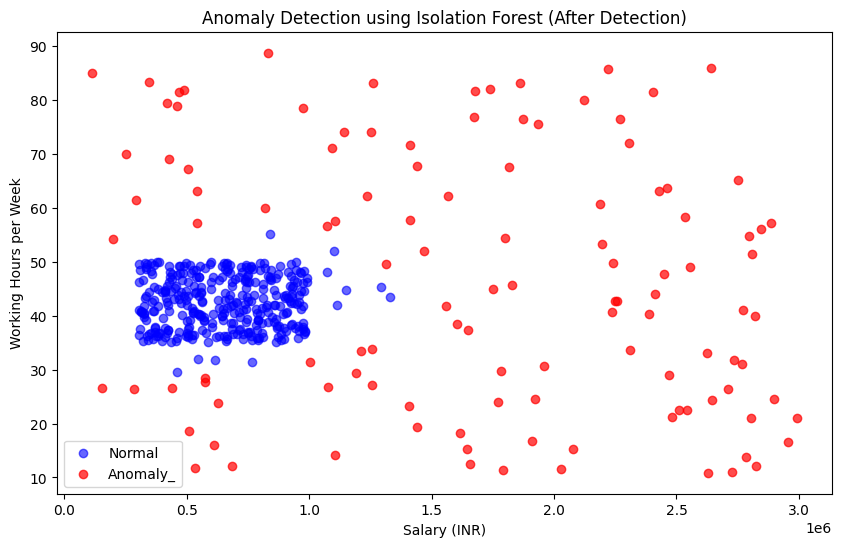

In [24]:
# 📌 Plot 2: Anomaly Detection Results (After Applying Isolation Forest)
plt.figure(figsize=(10, 6))
plt.scatter(normal_data['Salary_INR'], normal_data['Working_Hours'], label="Normal", color="blue", alpha=0.6)
plt.scatter(anomalies['Salary_INR'], anomalies['Working_Hours'], label="Anomaly_", color="red", alpha=0.7)
plt.xlabel("Salary (INR)")
plt.ylabel("Working Hours per Week")
plt.title("Anomaly Detection using Isolation Forest (After Detection)")
plt.legend()
plt.show()

In [25]:
# Display the number of anomalies detected
print(f"Total anomalies detected: {len(anomalies)}")

Total anomalies detected: 116


### Method 2 To detect Anomalies

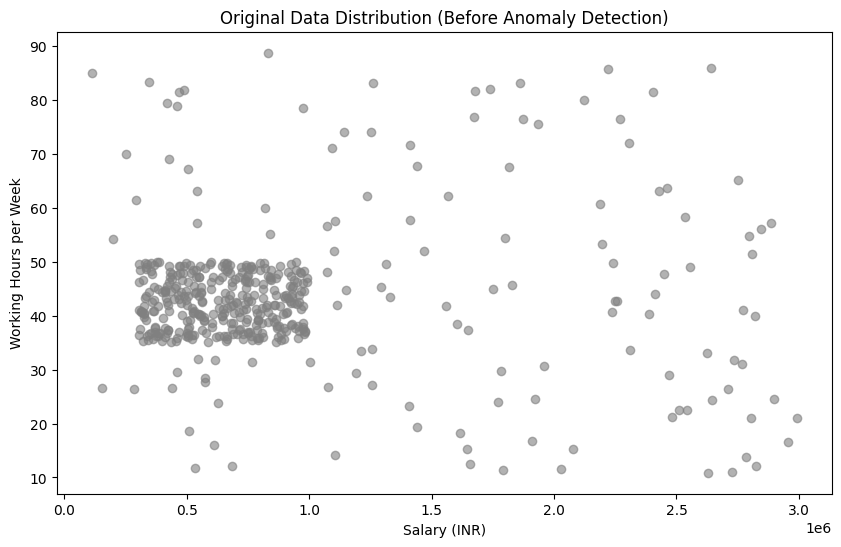

C:\Users\JOYEETA\AppData\Local\Temp\ipykernel_16048\2645947224.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anomaly_Score'] = clf.decision_function(df[['Salary_INR', 'Working_Hours']])
C:\Users\JOYEETA\AppData\Local\Temp\ipykernel_16048\2645947224.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anomaly'] = clf.predict(df[['Salary_INR', 'Working_Hours']])


Calculated Contamination Rate: 0.2555


C:\Users\JOYEETA\AppData\Local\Temp\ipykernel_16048\2645947224.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anomaly_Score'] = clf.decision_function(df[['Salary_INR', 'Working_Hours']])
C:\Users\JOYEETA\AppData\Local\Temp\ipykernel_16048\2645947224.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anomaly'] = clf.predict(df[['Salary_INR', 'Working_Hours']])


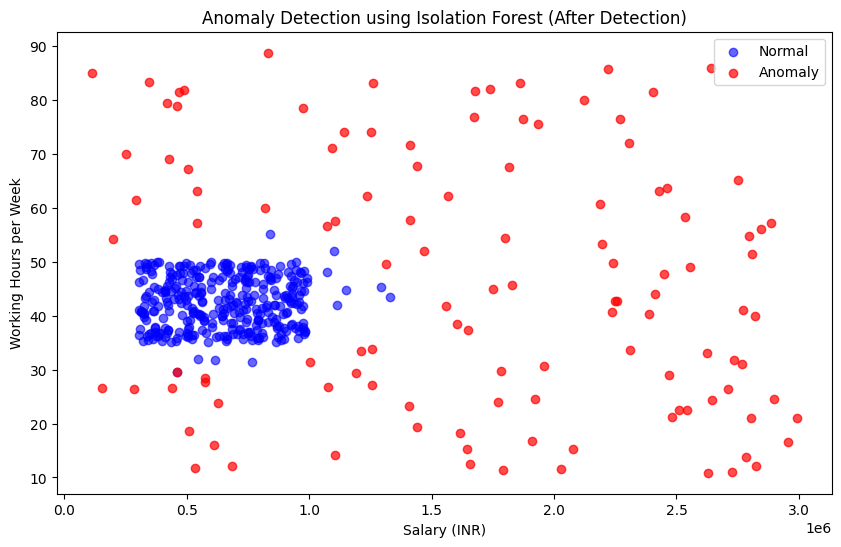

Total anomalies detected using threshold 0.0019: 117

🔹 Model Performance Metrics 🔹
✅ Accuracy: 1.0000
✅ Precision: 1.0000
✅ Recall: 1.0000
✅ F1-Score: 1.0000


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 📌 Plot 1: Original Data Distribution
plt.figure(figsize=(10, 6))
plt.scatter(df['Salary_INR'], df['Working_Hours'], color="gray", alpha=0.6)
plt.xlabel("Salary (INR)")
plt.ylabel("Working Hours per Week")
plt.title("Original Data Distribution (Before Anomaly Detection)")
plt.show()

# Step 1: Fit Isolation Forest with 'auto' contamination
clf = IsolationForest(contamination="auto", random_state=42)
clf.fit(df[['Salary_INR', 'Working_Hours']])

# Get Anomaly Scores
df['Anomaly_Score'] = clf.decision_function(df[['Salary_INR', 'Working_Hours']])
df['Anomaly'] = clf.predict(df[['Salary_INR', 'Working_Hours']])

# Step 2: Calculate the actual contamination
contamination = len(df.query("Anomaly == -1")) / len(df)
print(f"Calculated Contamination Rate: {contamination:.4f}")

# Step 3: Fit Isolation Forest again with actual contamination
clf = IsolationForest(contamination=contamination, random_state=42)
clf.fit(df[['Salary_INR', 'Working_Hours']])

# Update Anomaly Scores and Predictions
df['Anomaly_Score'] = clf.decision_function(df[['Salary_INR', 'Working_Hours']])
df['Anomaly'] = clf.predict(df[['Salary_INR', 'Working_Hours']])

# Step 4: Query anomalies using a custom threshold
threshold = 0.0019  # You can adjust this based on your analysis
anomalies = df.query("Anomaly_Score < @threshold")

# 📌 Plot 2: Anomaly Detection Results
plt.figure(figsize=(10, 6))
plt.scatter(df.query("Anomaly == 1")['Salary_INR'], df.query("Anomaly == 1")['Working_Hours'],
            label="Normal", color="blue", alpha=0.6)
plt.scatter(anomalies['Salary_INR'], anomalies['Working_Hours'],
            label="Anomaly", color="red", alpha=0.7)
plt.xlabel("Salary (INR)")
plt.ylabel("Working Hours per Week")
plt.title("Anomaly Detection using Isolation Forest (After Detection)")
plt.legend()
plt.show()

# Step 5: Print number of anomalies
print(f"Total anomalies detected using threshold {threshold}: {len(anomalies)}")

# Step 6: Performance Metrics
y_true = np.array([1 if anomaly == 1 else -1 for anomaly in df['Anomaly']])
y_pred = np.array(df['Anomaly'])

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label=-1)
recall = recall_score(y_true, y_pred, pos_label=-1)
f1 = f1_score(y_true, y_pred, pos_label=-1)

print(f"\n🔹 Model Performance Metrics 🔹")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-Score: {f1:.4f}")

In [27]:
df

,Salary_INR,Working_Hours,Anomaly_values,Anomaly_,Anomaly_Score,Anomaly
0,562178.0,42.55,1,1,0.124850,1
1,965500.0,47.85,1,1,0.088184,1
2,812396.0,44.88,1,1,0.121158,1
3,719061.0,37.44,1,1,0.112392,1
4,409213.0,36.06,1,1,0.092038,1
...,...,...,...,...,...,...
492,616304.0,31.77,1,1,0.034028,1
493,2887104.0,57.22,-1,-1,-0.133426,-1
496,347514.0,83.39,-1,-1,-0.146732,-1
497,2990935.0,20.95,-1,-1,-0.155733,-1


## **🔍 Understanding Anomaly Detection with Isolation Forest**  
Anomaly detection is the process of identifying rare items, events, or observations that differ significantly from the majority of the data. **Isolation Forest** is a popular algorithm for this, and we have two different approaches to implement it.  

### **📌 Key Difference Between Both Approaches**  
1️⃣ **Method 1 (Manual Separation Approach)**  
   - Uses `fit_predict()` directly to classify anomalies as **`-1` (Anomaly) and `1` (Normal)**.  
   - Manually separates the data based on these labels.  
   - No anomaly score is calculated explicitly.  
   - Relies solely on Isolation Forest’s predictions.  

2️⃣ **Method 2 (Anomaly Score & Threshold Approach)**  
   - Uses the **decision function** (`decision_function()`) to calculate an **Anomaly Score** for each point.  
   - Anomalies are identified using a **custom threshold** on the score.  
   - Provides **more flexibility**, as we can fine-tune the threshold.  
   - Additionally computes **performance metrics** (Accuracy, Precision, Recall, F1-score).  

Now, let’s **break down** both approaches **step by step** 👇  

---

## **🛠️ Method 1: Manual Separation Approach**
### **Step 1: Train the Initial Isolation Forest**
```python
iso_forest = IsolationForest(contamination="auto", random_state=42)
df['Anomaly_values'] = iso_forest.fit_predict(df[['Salary_INR', 'Working_Hours']])
df['Anomaly_values'].value_counts()
```
🔹 **What happens here?**  
- We **initialize** the Isolation Forest model.  
- The **contamination="auto"** allows the model to estimate the fraction of anomalies.  
- `fit_predict()` assigns each data point a label:  
  - **`1` → Normal Data**  
  - **`-1` → Anomaly (Outlier)**  

---

### **Step 2: Calculate Actual Contamination Rate**
```python
fraud = df[df['Anomaly_values'] == -1]
valid = df[df['Anomaly_values'] == 1]
contamination = len(fraud) / float(len(df))
print(f"Calculated Contamination Rate: {contamination:.4f}")
```
🔹 **Why do we do this?**  
- We extract the **anomalous (fraud)** and **valid (normal)** points.  
- Calculate the **actual contamination rate** for better model tuning.  

---

### **Step 3: Train the Model Again with Actual Contamination**
```python
iso_forest = IsolationForest(contamination=contamination, random_state=42)
df['Anomaly_'] = iso_forest.fit_predict(df[['Salary_INR', 'Working_Hours']])
```
🔹 **Why retrain?**  
- Instead of relying on the auto-estimated contamination, we use the **real contamination rate** for more accurate results.  

---

### **Step 4: Visualize the Anomalies**
```python
normal_data = df[df['Anomaly_'] == 1]
anomalies = df[df['Anomaly_'] == -1]

plt.figure(figsize=(10, 6))
plt.scatter(normal_data['Salary_INR'], normal_data['Working_Hours'], label="Normal", color="blue", alpha=0.6)
plt.scatter(anomalies['Salary_INR'], anomalies['Working_Hours'], label="Anomaly", color="red", alpha=0.7)
plt.xlabel("Salary (INR)")
plt.ylabel("Working Hours per Week")
plt.title("Anomaly Detection using Isolation Forest (After Detection)")
plt.legend()
plt.show()
print(f"Total anomalies detected: {len(anomalies)}")
```
🔹 **Key Insights:**  
- We **separate normal and anomalous data** using `1` and `-1` labels.  
- A **scatter plot** shows **red points (anomalies)** and **blue points (normal data)**.  
- The total number of anomalies is displayed.  

💡 **This method relies solely on `fit_predict()`, without using an anomaly score.**  

---

## **🛠️ Method 2: Anomaly Score & Threshold Approach**
### **Step 1: Plot the Original Data**
```python
plt.figure(figsize=(10, 6))
plt.scatter(df['Salary_INR'], df['Working_Hours'], color="gray", alpha=0.6)
plt.xlabel("Salary (INR)")
plt.ylabel("Working Hours per Week")
plt.title("Original Data Distribution (Before Anomaly Detection)")
plt.show()
```
🔹 **Why plot this?**  
- Helps us **visualize** the raw dataset before detecting anomalies.  

---

### **Step 2: Train the Initial Isolation Forest**
```python
clf = IsolationForest(contamination="auto", random_state=42)
clf.fit(df[['Salary_INR', 'Working_Hours']])

df['Anomaly_Score'] = clf.decision_function(df[['Salary_INR', 'Working_Hours']])
df['Anomaly'] = clf.predict(df[['Salary_INR', 'Working_Hours']])
```
🔹 **What happens here?**  
- The **`decision_function()`** calculates an **Anomaly Score**:  
  - **Higher Score** → More likely normal.  
  - **Lower Score** → More likely an anomaly.  
- **Unlike Method 1**, we use a **numerical score** instead of just `1` or `-1`.  

---

### **Step 3: Calculate Actual Contamination Rate**
```python
contamination = len(df.query("Anomaly == -1")) / len(df)
print(f"Calculated Contamination Rate: {contamination:.4f}")
```
- The **real contamination rate** is calculated **just like in Method 1**.  

---

### **Step 4: Retrain the Model**
```python
clf = IsolationForest(contamination=contamination, random_state=42)
clf.fit(df[['Salary_INR', 'Working_Hours']])

df['Anomaly_Score'] = clf.decision_function(df[['Salary_INR', 'Working_Hours']])
df['Anomaly'] = clf.predict(df[['Salary_INR', 'Working_Hours']])
```
- We **retrain the model** with the **real contamination value**.  

---

### **Step 5: Separate Anomalies Using a Custom Threshold**
```python
threshold = 0.0019  # Custom threshold
anomalies = df.query("Anomaly_Score < @threshold")
```
🔹 **Key Difference Here:**  
- Instead of relying on `1` and `-1` directly, we **use an Anomaly Score threshold**.  
- This allows us to **fine-tune** what we consider an anomaly.  

---

### **Step 6: Visualize the Results**
```python
plt.figure(figsize=(10, 6))
plt.scatter(df.query("Anomaly == 1")['Salary_INR'], df.query("Anomaly == 1")['Working_Hours'],
            label="Normal", color="blue", alpha=0.6)
plt.scatter(anomalies['Salary_INR'], anomalies['Working_Hours'],
            label="Anomaly", color="red", alpha=0.7)
plt.xlabel("Salary (INR)")
plt.ylabel("Working Hours per Week")
plt.title("Anomaly Detection using Isolation Forest (After Detection)")
plt.legend()
plt.show()
```
- **Blue points = Normal Data**  
- **Red points = Anomalies (identified using threshold)**  

---

### **Step 7: Compute Performance Metrics**
```python
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label=-1)
recall = recall_score(y_true, y_pred, pos_label=-1)
f1 = f1_score(y_true, y_pred, pos_label=-1)

print(f"\n🔹 Model Performance Metrics 🔹")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-Score: {f1:.4f}")
```
**Why this matters?**  
- Helps **evaluate model performance** using key classification metrics.  

---

## **🎯 Summary: Key Takeaways**
| Feature | Method 1 (Manual Separation) | Method 2 (Anomaly Score & Threshold) |
|---------|------------------------------|--------------------------------------|
| Outlier Detection | Uses `fit_predict()` (`-1` & `1`) | Uses `decision_function()` (Anomaly Score) |
| Threshold | None (Uses raw labels) | Custom threshold to refine anomalies |
| Flexibility | Less flexible | More control over detection |
| Performance Metrics | No evaluation | Accuracy, Precision, Recall, F1-score |

✅ **Method 2** is more **flexible and tunable** for anomaly detection.  